# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

/Users/jsohn/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",index_col=0)
df.head(5)

,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
Owner Zip Code,,,,,,,,,,,,,,
10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.shape

(81937, 14)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [4]:
df.keys()

Index(['Animal Name', 'Animal Gender', 'Primary Breed', 'Secondary Breed',
       'Animal Dominant Color', 'Animal Secondary Color', 'Animal Third Color',
       'Animal Birth', 'Spayed or Neut', 'Guard or Trained', 'Vaccinated',
       'Application Date', 'License Issued Date', 'License Expired Date'],
      dtype='object')

In [5]:
#Each row is information of a dog with a license.
#Animal gender is whether a dog is a female or a male.
#Primary Breed is a primary breed of a dog.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [6]:
#How many dogs have expired licenses.
#How many % of Samoyed
#How many primary breeds are there?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [7]:
df['Primary Breed'].value_counts().head(10)

Unknown                                 12894
Yorkshire Terrier                        5133
Shih Tzu                                 4727
Chihuahua                                3924
Maltese                                  2965
Labrador Retriever                       2872
American Pit Bull Terrier/Pit Bull       2153
American Pit Bull Mix / Pit Bull Mix     2029
Labrador Retriever Crossbreed            1864
Beagle                                   1438
Name: Primary Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

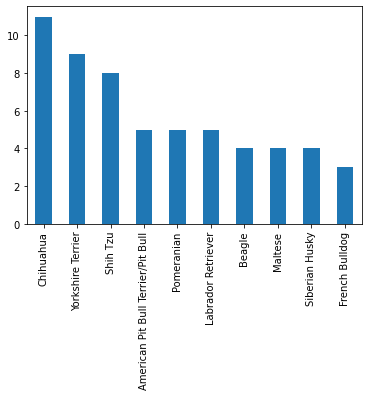

In [8]:
df.drop(df[ df['Primary Breed'] == 'Unknown' ].index , inplace=True)
df['Primary Breed'].value_counts().head(10).plot(kind="bar")

In [9]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",index_col=0)

## What are the most popular dog names?

In [10]:
df['Animal Name'].value_counts().head(11)

UNKNOWN    742
Bella      527
Max        515
Charlie    403
Lola       387
Unknown    379
Rocky      354
Lucy       338
unknown    337
Coco       308
Buddy      300
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [11]:
df[df['Animal Name']=='Max'].count()

Animal Name               515
Animal Gender             515
Primary Breed             515
Secondary Breed            69
Animal Dominant Color     513
Animal Secondary Color    375
Animal Third Color        120
Animal Birth              515
Spayed or Neut            515
Guard or Trained          314
Vaccinated                515
Application Date          515
License Issued Date       515
License Expired Date      515
dtype: int64

In [12]:
df[df['Animal Name']=='Maxwell'].count()

Animal Name               30
Animal Gender             30
Primary Breed             30
Secondary Breed            4
Animal Dominant Color     30
Animal Secondary Color    21
Animal Third Color        10
Animal Birth              30
Spayed or Neut            30
Guard or Trained          19
Vaccinated                30
Application Date          30
License Issued Date       30
License Expired Date      30
dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [13]:
df['Guard or Trained'].value_counts(normalize = True)

No     0.998971
Yes    0.001029
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [14]:
df['Guard or Trained'].value_counts()

No     49525
Yes       51
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [15]:
df[pd.isnull(df['Guard or Trained'])]['License Issued Date'].count()

32361

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [16]:
df['Guard or Trained'] = df['Guard or Trained'].replace({np.nan:'No'})
df['Guard or Trained'].value_counts()

No     81886
Yes       51
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [17]:
df[df['Guard or Trained'] =="Yes"]['Primary Breed'].value_counts()

Unknown                                 11
German Shepherd Dog                      4
Chihuahua                                3
Rottweiler                               3
Labrador Retriever                       3
American Pit Bull Mix / Pit Bull Mix     3
Staffordshire Bull Terrier               2
Shih Tzu                                 2
Dachshund, Long Haired                   1
Maltese                                  1
Schnauzer, Miniature                     1
Miniature Pinscher                       1
Poodle, Toy                              1
Poodle, Standard                         1
Weimaraner                               1
German Shepherd Crossbreed               1
Welsh Corgi, Pembroke                    1
Poodle, Miniature                        1
Siberian Husky                           1
Pekingese                                1
Yorkshire Terrier                        1
Shetland Sheepdog                        1
Boxer                                    1
Jack Russel

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [18]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [19]:
df['age'] = 2021 - df['year']
df['age'].mean().round(2)

11.34

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [20]:
zip_df = pd.read_csv("zipcodes-neighborhoods.csv",index_col=0)
zip_df.head()

,zip,borough
neighborhood,,
Central Bronx,10453,Bronx
Central Bronx,10457,Bronx
Central Bronx,10460,Bronx
Bronx Park and Fordham,10458,Bronx
Bronx Park and Fordham,10467,Bronx


In [21]:
zip_df.reindex()
zip_df.head()

,zip,borough
neighborhood,,
Central Bronx,10453,Bronx
Central Bronx,10457,Bronx
Central Bronx,10460,Bronx
Bronx Park and Fordham,10458,Bronx
Bronx Park and Fordham,10467,Bronx


In [22]:
zip_df['neighborhood'] = zip_df.index

In [23]:
zip_df.reindex()
merged_df = df.merge(zip_df, how='left', left_on='Owner Zip Code', right_on='zip')
#merged_df.shape
merged_df.head()

,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,zip,borough,neighborhood
0,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,10024.0,Manhattan,Upper West Side
1,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,8,10461.0,Bronx,Southeast Bronx
2,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,7,10013.0,Manhattan,Greenwich Village and Soho
3,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,13,10025.0,Manhattan,Upper West Side
4,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,7,10013.0,Manhattan,Greenwich Village and Soho


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [24]:
merged_df[merged_df.borough == 'Bronx' ]['Animal Name'].value_counts().head(1)

Rocky    60
Name: Animal Name, dtype: int64

In [25]:
merged_df[merged_df.borough == 'Brooklyn' ]['Animal Name'].value_counts().head(10)

unknown                  234
Unknown                  161
UNKNOWN                  155
Max                      113
Bella                    112
Charlie                   96
Lola                      88
Dog Name Not Provided     84
Lucy                      80
Rocky                     80
Name: Animal Name, dtype: int64

In [26]:
merged_df[merged_df.neighborhood == 'Upper East Side' ]['Animal Name'].value_counts().head(10)

Lucy                     40
Bella                    31
Charlie                  29
Coco                     29
NO NAME                  26
Lola                     25
Dog Name Not Provided    22
Bailey                   21
Molly                    20
UNKNOWN                  20
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [27]:
merged_df.neighborhood.value_counts().shape

(42,)

In [28]:
merged_df.groupby(by='neighborhood')['Primary Breed'].value_counts().to_frame().groupby(by='neighborhood').head(2)

Primary Breed
neighborhood              Primary Breed                    
Borough Park              Unknown                       287
                          Yorkshire Terrier             115
Bronx Park and Fordham    Unknown                       121
                          Yorkshire Terrier              88
Bushwick and Williamsburg Unknown                       196
...                                                     ...
Upper West Side           Labrador Retriever            295
West Central Queens       Unknown                       508
                          Yorkshire Terrier             184
West Queens               Unknown                       465
                          Shih Tzu                      218

[84 rows x 1 columns]

## What breed of dogs are the least likely to be spayed? Male or female?

In [29]:
merged_df.groupby(by = (['Primary Breed','Animal Gender']))['Spayed or Neut']


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [39]:
merged_df['monocolor'] = False

#merged_df.head()

In [47]:
merged_df['Animal Dominant Color']= merged_df['Animal Dominant Color'].str.upper()
merged_df['Animal Secondary Color']= merged_df['Animal Secondary Color'].str.upper()
merged_df['Animal Third Color']= merged_df['Animal Third Color'].str.upper()


filter1 = merged_df['Animal Dominant Color'].isin(['BLACK', 'WHITE', 'GREY'])
filter2 = merged_df['Animal Secondary Color'].isin(['BLACK', 'WHITE', 'GREY', np.nan])
filter3 = merged_df['Animal Third Color'].isin(['BLACK', 'WHITE', 'GREY', np.nan])

#merged_df.loc[merged_df[filter1 & filter2 & filter3], 'monocolor'] = True

merged_df.loc[filter1 & filter2 & filter3 , 'monocolor']= True

In [49]:
merged_df.head()

,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,zip,borough,neighborhood,monocolor
0,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,10024.0,Manhattan,Upper West Side,False
1,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,8,10461.0,Bronx,Southeast Bronx,False
2,Bilal,M,Australian Cattledog,NaN,RUST,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,7,10013.0,Manhattan,Greenwich Village and Soho,False
3,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,13,10025.0,Manhattan,Upper West Side,False
4,Ali,M,Basenji,NaN,BLACK,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,7,10013.0,Manhattan,Greenwich Village and Soho,True


In [48]:
merged_df['monocolor'].value_counts()

False    62641
True     19296
Name: monocolor, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

In [ ]:
dog_population_df = pd.DataFrame(merged_df.groupby(by = 'borough')['Animal Name'].count())
dog_population_df

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [ ]:
capita_df = pd.read_csv("boro_population.csv", index_col=0)

In [ ]:
capita_df.head()

In [ ]:
dog_man_pop_df=dog_population_df.merge(capita_df, left_on='borough', right_on='borough')


In [ ]:
dog_man_pop_df

In [ ]:
dog_man_pop_df['dog_per_capita'] = dog_man_pop_df['Animal Name']/dog_man_pop_df.population
dog_man_pop_df.sort_values(by='dog_per_capita', ascending=False)

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [ ]:
merged_df.groupby(by='borough')['Primary Breed'].value_counts().to_frame().groupby(by='borough').head(5).plot(kind='bar', figsize=(20, 20),fontsize=25)

## What percentage of dogs are not guard dogs?

In [ ]:
round(0.998971*100, 2)

In [ ]:
#merged_df.groupby(by= 'monocolor')
c_df = merged_df[['Animal Dominant Color', 'Animal Secondary Color', 'Animal Third Color']].isin({
    'Animal Dominant Color': ['BLACK', 'WHITE', 'GREY', np.nan],
    'Animal Secondary Color': ['BLACK', 'WHITE', 'GREY', np.nan],
    'Animal Third Color': ['BLACK', 'WHITE', 'GREY', np.nan],
})
c_df
#c_df[(c_df['Animal Dominant Color'] & c_df['Animal Secondary Color'] & c_df['Animal Third Color'])]